In [1]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import statistics
import datashader as ds
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pickle
import umap.plot
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')

c:\users\dato\appdata\local\programs\python\python37\lib\site-packages\datashader\transfer_functions.py:21: FutureWarning: xarray subclass Image should explicitly define __slots__
  class Image(xr.DataArray):


In [2]:
df = pd.read_csv('MyTable_Galaxy_Dato1998.csv') #load in SDSS specroscopic data
#Clean the data by cutting out data at unrealistic magnitudes
df = df.fillna('N')

In [3]:
for col in ['mag_g','mag_r','mag_i','mag_z']:
    df=df.where(df[col] >-1000)
df = df.dropna()

In [5]:
df=df.where(df['cls'] == 'GALAXY') #only select galaxies
df = df.dropna()

In [6]:
df = df[:int(len(df)/20)] #cut the dataset in 20 for performance regions


In [12]:
X = df[['mag_g','mag_r','mag_i','mag_z','z','mass']].to_numpy() #select features

In [13]:
reducer = umap.UMAP().fit(X) #reduce the data to 2 dim using UMAP

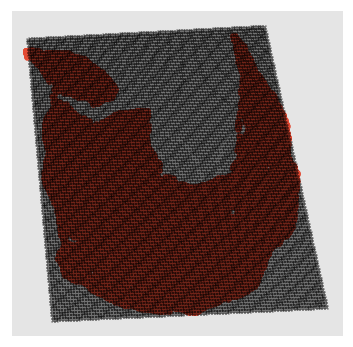

In [14]:
#Choose the points in latent space to fit the reduced data
corners = np.array([
    [-7, 14],  # 1
    [-5, -8],  # 7
    [12, 15],  # 2
    [17, -7],  # 0
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 100)
    for x in np.linspace(0, 1, 100)
])
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1])
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15, alpha=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


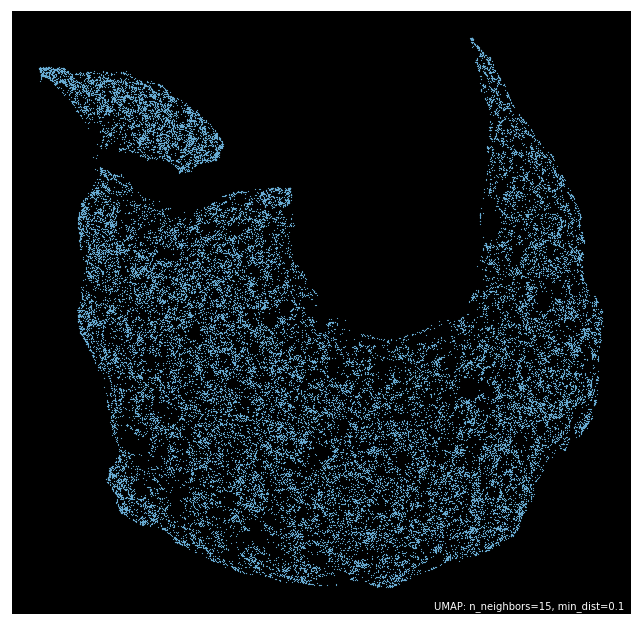

In [15]:
umap.plot.points(reducer, background='black') #plot the 2d plot produced by UMAP


In [16]:
inv_transformed_points = reducer.inverse_transform(test_pts) #Generate data using inverse UMAP transform

In [18]:
trans = inv_transformed_points.transpose() #transpose the generated array

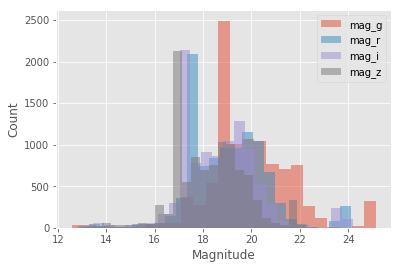

In [19]:
#Plot the generated magnitudes
for col in range(4):
     plt.hist(trans[col], alpha=0.5, bins=25)
plt.legend(['mag_g','mag_r','mag_i','mag_z'])
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

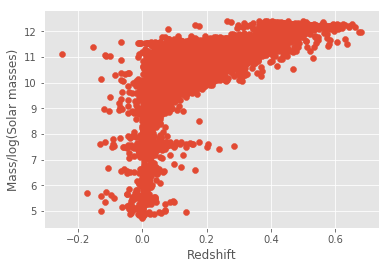

In [20]:
#Plot generated redshift against mass
plt.scatter(trans[4], trans[5])

plt.xlabel('Redshift')
plt.ylabel('Mass/log(Solar masses)')
plt.show()